In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# 1. Load Data
df = pd.read_csv('Infrared.csv')
df

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Female,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.3475,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.99
1016,Female,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2175,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.19
1017,Female,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2400,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.59
1018,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,35.0200,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.29


In [3]:
df = df.dropna()

# 3. Preprocessing
# Pisahkan fitur dan target
X = df.drop('aveOralM', axis=1)
y = df['aveOralM']

# Identifikasi kolom kategorikal dan numerik
categorical_cols = ['Gender', 'Age', 'Ethnicity']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # sparse_output=False untuk pandas DataFrame
    ])

df

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Female,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.3475,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.99
1016,Female,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2175,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.19
1017,Female,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2400,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.59
1018,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,35.0200,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.29


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
# Base model untuk Bagging
base_tree = RandomForestRegressor(max_depth=5, random_state=42)

# Bagging Model
bagging_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('bagging', BaggingRegressor(
        estimator=base_tree,
        n_estimators=100,
        random_state=42
    ))
])


# Boosting Model (Gradient Boosting)
boosting_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('boosting', GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# 6. Train Models
bagging_model.fit(X_train, y_train)
boosting_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['T_atm', 'Humidity',
                                                   'Distance', 'T_offset1',
                                                   'Max1R13_1', 'Max1L13_1',
                                                   'aveAllR13_1', 'aveAllL13_1',
                                                   'T_RC1', 'T_RC_Dry1',
                                                   'T_RC_Wet1', 'T_RC_Max1',
                                                   'T_LC1', 'T_LC_Dry1',
                                                   'T_LC_Wet1', 'T_LC_Max1',
                                                   'RCC1', 'LCC1', 'canthiMax1',
                                                   'canthi4Max1', 'T_FHCC1',
                                                   'T_FHRC1', 'T_FHLC1',
                                                   'T_FHBC1', 'T_FHTC1',
                                                   'T_FH_Max1', 'T_FHC_Max1',
                                                   'T_Max1', 'T_OR1',
                                                   'T_OR_Max1']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Age',
                                                   'Ethnicity'])])),
                ('boosting', GradientBoostingRegressor(random_state=42))])

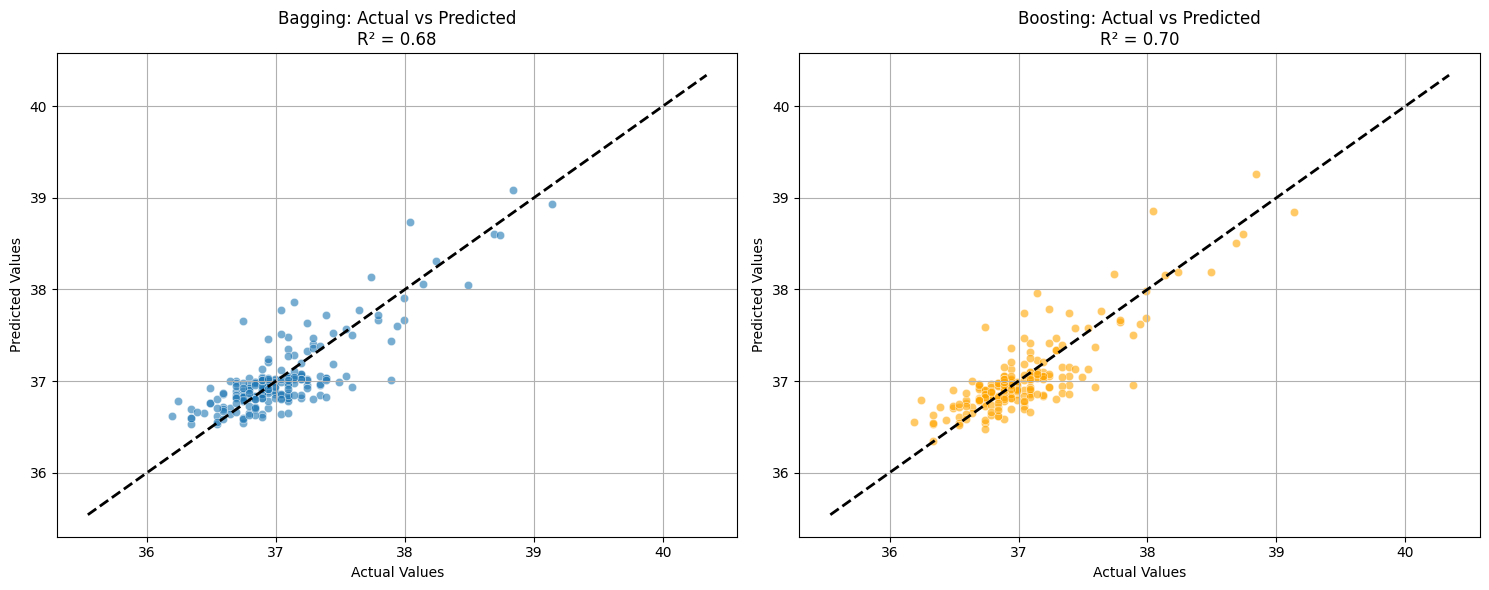

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
y_pred_bagging = bagging_model.predict(X_test)
y_pred_boosting = boosting_model.predict(X_test)

# Create figure
plt.figure(figsize=(15, 6))

# Plot Bagging results
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_bagging, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.title('Bagging: Actual vs Predicted\nR² = {:.2f}'.format(r2_score(y_test, y_pred_bagging)))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Plot Boosting results
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_boosting, alpha=0.6, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Boosting: Actual vs Predicted\nR² = {:.2f}'.format(r2_score(y_test, y_pred_boosting)))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()

# 📊 Persamaan Matematika Model Boosting & Bagging

Notebook ini menggunakan dua algoritma machine learning utama untuk regresi harga mobil:

- **Gradient Boosting Regressor** (Boosting)
- **Random Forest Regressor** (Bagging)

---

## 1. Gradient Boosting Regressor (Boosting)

Gradient Boosting adalah teknik ensemble yang menggabungkan beberapa model lemah (pohon keputusan) secara bertahap untuk meminimalkan fungsi kerugian.

### Model Umum:

\[
F_M(x) = \sum_{m=1}^{M} \gamma_m h_m(x)
\]

Keterangan:
- \( M \): jumlah total iterasi (jumlah pohon)
- \( h_m(x) \): model pohon keputusan ke-\(m\)
- \( \gamma_m \): learning rate (dalam program: `learning_rate = 0.5`)

### Langkah Pembaruan Tiap Iterasi:

\[
r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m-1}(x)}
\]

Kemudian:

\[
F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)
\]

---

## 2. Random Forest Regressor (Bagging)

Random Forest adalah teknik ansambel berbasis bagging, yang membangun banyak pohon keputusan secara paralel dari subset data dan fitur secara acak.

### Model Umum:

\[
\hat{f}(x) = \frac{1}{T} \sum_{t=1}^{T} f_t(x)
\]

Keterangan:
- \( T \): jumlah pohon dalam hutan (`n_estimators = 200`)
- \( f_t(x) \): prediksi dari pohon ke-\(t\)
- Setiap pohon dilatih dengan data bootstrap dan subset acak fitur

---

## 3. Evaluasi Model

Model dievaluasi menggunakan dua metrik utama:

### Mean Squared Error (MSE):

\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

### Koefisien Determinasi (R²):

\[
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\]

---
